In [2]:
import pandas as pd
from collections import Counter
import itertools

# Load data hasil preprocessing
df = pd.read_csv("../data/dataset_clean.csv")


### Analisis Statistik

In [3]:
df['title_len'] = df['Title'].apply(lambda x: len(x.split()))
df['keyword_len'] = df['Keyword'].apply(lambda x: len(x.split()))
df['abstrak_len'] = df['Abstrak'].apply(lambda x: len(x.split()))

df[['title_len', 'keyword_len', 'abstrak_len']].describe()

,title_len,keyword_len,abstrak_len
count,6189.000000,6189.000000,6189.000000
mean,13.236549,8.923574,130.106318
std,3.820168,3.603553,42.148263
min,2.000000,1.000000,1.000000
25%,11.000000,7.000000,121.000000
50%,13.000000,8.000000,138.000000
75%,16.000000,11.000000,151.000000
max,30.000000,44.000000,296.000000


In [4]:
#FREKUENSI KATA
all_words = list(itertools.chain(*df['Abstrak'].str.split()))
word_freq = Counter(all_words)

word_freq.most_common(10)

[('guna', 23505),
 ('hasil', 14255),
 ('uji', 11875),
 ('laku', 11424),
 ('sistem', 10496),
 ('teliti', 8683),
 ('data', 8644),
 ('metode', 7573),
 ('dapat', 7520),
 ('nilai', 7321)]

### Visualisasi

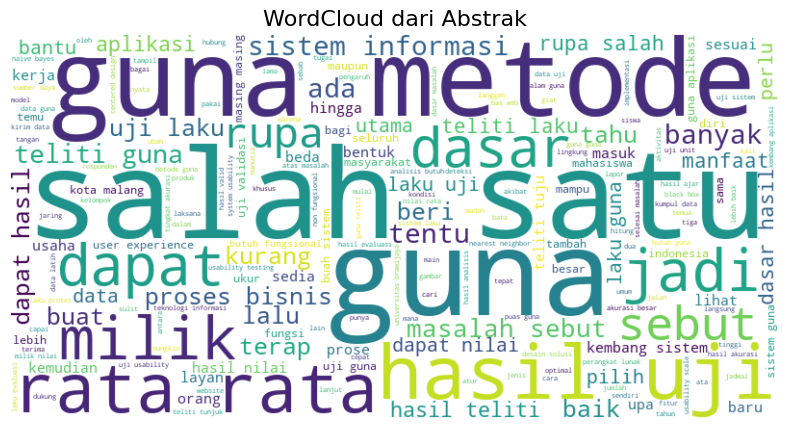

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_text = ' '.join(df['Abstrak'])

#Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud dari Abstrak", fontsize=16)
plt.show()


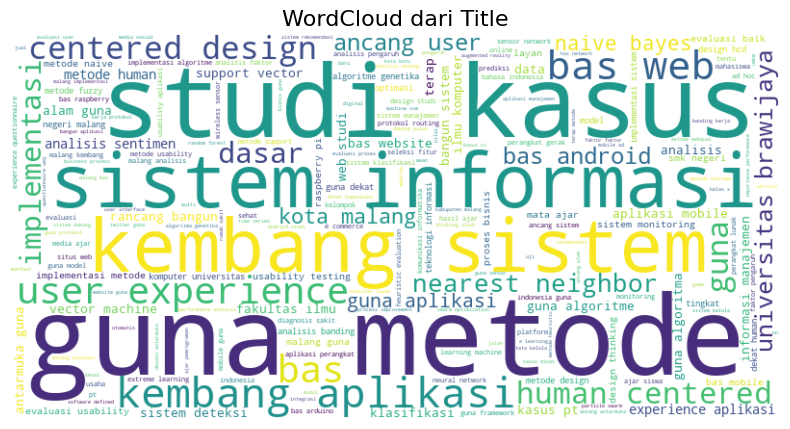

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_text = ' '.join(df['Title'])

#Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud dari Title", fontsize=16)
plt.show()


### TF-IDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF pada kolom Abstrak_clean
tfidf = TfidfVectorizer(
    max_features=1000,      
    ngram_range=(1, 2),   
    min_df=3,             
    max_df=0.9              
)

tfidf_matrix = tfidf.fit_transform(df['Abstrak'])

print("Shape TF-IDF matrix:", tfidf_matrix.shape)


Shape TF-IDF matrix: (6189, 1000)
